# Quantum information lab project 

## Quantum Dice – Quantum Random Number Generator 

This project demonstrates a Quantum Dice, implemented using Qiskit, where truly random numbers are generated using quantum superposition and measurement.  

## Project Description

A classical dice uses pseudo-random algorithms, but quantum systems naturally produce true randomness.  
By preparing qubits in a uniform superposition using the Hadamard gate and measuring them, we generate a random number between 1 and 6, behaving like a quantum dice.

We use 3 qubits → 8 possible outcomes (0–7) and ignore values 0 and 7.  
Values 1–6 represent dice outcomes.


## Objectives

- Understand and implement quantum superposition.
- Learn how quantum randomness is generated using Qiskit.
- Simulate quantum circuits using Qiskit Aer.
- Build a Quantum Random Number Generator.
- Map measurement outcomes to dice values (1–6).





In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt


First 10 dice rolls: [1, 3, 4, 2, 2, 4, 1, 2, 5, 5]


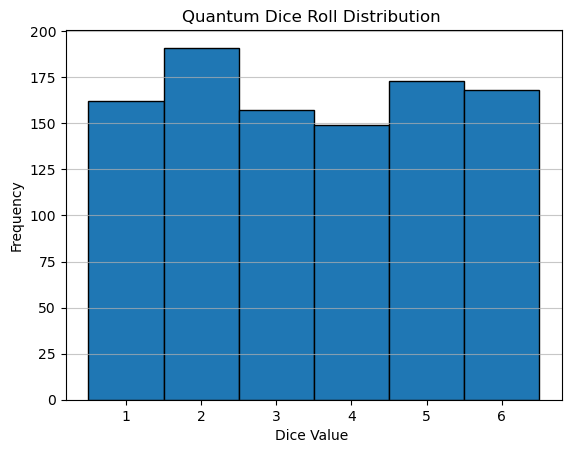

In [ ]:

def quantum_dice_single_roll():
    
    while True:
        qc = QuantumCircuit(3, 3)
        qc.h([0, 1, 2])
        qc.measure([0, 1, 2], [0, 1, 2])

        simulator = Aer.get_backend("qasm_simulator")

        compiled = transpile(qc, simulator)
        result = simulator.run(compiled, shots=1).result()
        counts = result.get_counts()

        measured_bits = list(counts.keys())[0]
        num = int(measured_bits, 2)

        if 1 <= num <= 6:
            return num


def generate_many_rolls(n=1000):
    data = []
    for _ in range(n):
        val = quantum_dice_single_roll()
        data.append(val)
    return data


if __name__ == "__main__":
    
    rolls = generate_many_rolls(1000)

    print("First 10 dice rolls:", rolls[:10])

    plt.hist(rolls, bins=np.arange(1, 8) - 0.5, edgecolor='black')
    plt.title("Quantum Dice Roll Distribution ")
    plt.xlabel("Dice Value ")
    plt.ylabel("Frequency")
    plt.xticks([1, 2, 3, 4, 5, 6])
    plt.grid(axis='y',  alpha=0.7)
    plt.show()
